In [1]:
import os
os.chdir('..')

In [2]:
from wisdom_tree import split_data, ID3, plot_confusion_matrix, calculate_metrics
from nb_utils import display_side_by_side, print_metrics_report
import pandas as pd

In [3]:
train_data = pd.read_csv('data/titanic/train.csv', sep=',')
X_test = pd.read_csv('data/titanic/test.csv', sep=',')
truth = pd.read_csv('data/titanic/truth.csv', sep=',')

age_median = train_data['Age'].median()
fare_median = train_data['Fare'].median()
embarked_mode = train_data['Embarked'].mode()[0]

train_data['Age'] = train_data['Age'].fillna(age_median)
X_test['Age'] = X_test['Age'].fillna(age_median)

train_data['Fare'] = train_data['Fare'].fillna(fare_median)
X_test['Fare'] = X_test['Fare'].fillna(fare_median)

train_data['Embarked'] = train_data['Embarked'].fillna(embarked_mode)
X_test['Embarked'] = X_test['Embarked'].fillna(embarked_mode)

age_bins = [0, 12, 18, 60, 100]
age_labels = ['Child', 'Teen', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=age_bins, labels=age_labels, right=False)

fare_labels = ['Low', 'Medium', 'High']
train_data['FareTier'], fare_bins = pd.qcut(train_data['Fare'], q=3, labels=fare_labels, retbins=True)
X_test['FareTier'] = pd.cut(X_test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

cols_to_drop = ['PassengerId', 'Name', 'Age', 'Fare', 'Ticket', 'Cabin']
train_data.drop(cols_to_drop, axis='columns', inplace=True)
X_test.drop(cols_to_drop, axis='columns', inplace=True)

y_test = truth['Survived'].astype(int)

train_data = train_data[[col for col in train_data.columns if col != 'Survived'] + ['Survived']]

In [4]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

display_side_by_side(X_train, y_train, names=['X', 'y'])
display_side_by_side(X_test, y_test, names=['X', 'y'])

In [5]:
arvere = ID3().fit(X_train, y_train)
arvere.plot()

Split(Sex), samples=891, samples_values=(549, 342)
├── female: Split(Pclass), samples=314, samples_values=(81, 233)
│   ├── 1: Split(AgeGroup), samples=94, samples_values=(3, 91)
│   │   ├── Adult: Split(Parch), samples=83, samples_values=(2, 81)
│   │   │   ├── 0: Split(Embarked), samples=58, samples_values=(1, 57)
│   │   │   │   ├── C: Split(SibSp), samples=31, samples_values=(1, 30)
│   │   │   │   │   ├── 0: Split(FareTier), samples=18, samples_values=(1, 17)
│   │   │   │   │   │   └── High: Predict(1), samples=18, samples_values=(1, 17)
│   │   │   │   │   └── 1: Predict(1), samples=13, samples_values=(0, 13)
│   │   │   │   ├── Q: Predict(1), samples=1, samples_values=(0, 1)
│   │   │   │   └── S: Predict(1), samples=26, samples_values=(0, 26)
│   │   │   ├── 1: Predict(1), samples=14, samples_values=(0, 14)
│   │   │   └── 2: Split(SibSp), samples=11, samples_values=(1, 10)
│   │   │       ├── 0: Predict(1), samples=5, samples_values=(0, 5)
│   │   │       ├── 1: Split(Embarke

In [6]:
predictions = arvere.predict(X_test)
predictions

[np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(1),
 np.in

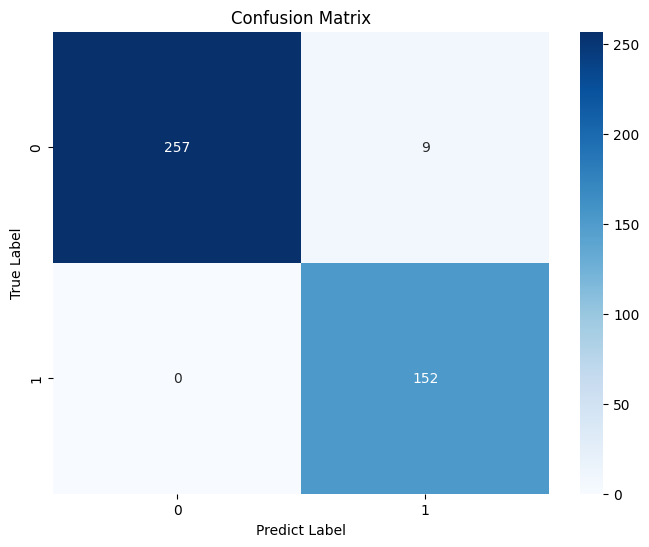

         Classification Report
Overall Accuracy: 0.9785

Class           Precision    Recall       F1-Score    
---------------------------------------------
0               1.0000       0.9662       0.9828      
1               0.9441       1.0000       0.9712      
---------------------------------------------
Macro Average   0.9720       0.9831       0.9770      


In [7]:
plot_confusion_matrix(y_test, predictions)
metrics = calculate_metrics(y_test, predictions)
print_metrics_report(metrics)